# Analysis Spectral Bands

## Packages and Data

In [46]:
import os
import sys

module_path = os.path.abspath(os.path.join(".."))
if module_path not in sys.path:
    sys.path.append(module_path)

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils.data_loader import DataLoader
from utils.calculate_indices import CalculateIndices

In [40]:
dataloader = DataLoader()
df_base = dataloader.load_transform("../../data/Trainings_Datensatz.csv")
df = dataloader.date_feature_extraction(df_base)
df = dataloader.feature_extraction(df)

In [41]:
calculateindices = CalculateIndices()
df = calculateindices.add_all_indices(df)

## Strange Values

In [42]:
# 33 rows with reip = inf (because b5 = b6)
# 432 rows with mcari = inf (because b4 = 0)

In [43]:
df[ (df["reip"] == np.inf)] 

,time,id,disturbance_year,doy,b2,b3,b4,b5,b6,b7,...,ndvi,gndvi,wdvi,tndvi,savi,ipvi,mcari,reip,masvi2,dvi
3592392,2019-04-15,1262,0,105,226,348,153,115,115,130,...,-0.200000,-0.456067,25.5,0.547723,-0.299413,0.400000,-22.849673,inf,-0.990243,-51
3592393,2019-04-21,1262,0,111,154,240,74,39,39,60,...,-0.423077,-0.600000,-7.0,0.277350,-0.631579,0.288462,-14.756757,inf,-0.967195,-44
3592434,2020-06-30,1262,0,182,259,449,141,118,118,146,...,0.037543,-0.509244,81.5,0.733173,0.056218,0.518771,-15.398582,inf,-0.993442,11
3940310,2022-03-08,2088,0,67,140,124,71,55,55,65,...,-0.314815,-0.312169,1.5,0.430331,-0.470046,0.342593,-9.915493,inf,-0.973324,-34
3940102,2019-06-03,2119,0,154,86,115,55,46,46,54,...,0.017857,-0.360947,29.5,0.719623,0.026667,0.508929,-6.021818,inf,-0.982606,2
4008871,2020-08-11,2289,0,224,752,898,237,183,183,202,...,-0.048673,-0.632727,96.5,0.671809,-0.072928,0.475664,-33.356962,inf,-0.995360,-22
3750994,2018-04-16,2525,0,106,184,268,99,89,89,113,...,0.014925,-0.406824,52.5,0.717583,0.022333,0.507463,-7.191919,inf,-0.990243,3
3750997,2018-05-11,2525,0,131,205,243,66,43,43,64,...,-0.081967,-0.583062,23.0,0.646555,-0.122449,0.459016,-11.987879,inf,-0.982298,-10
3593011,2019-05-21,3659,0,141,187,273,100,91,91,116,...,0.122807,-0.403599,78.0,0.789181,0.183807,0.561404,-6.552000,inf,-0.992218,28
3593031,2020-03-02,3659,0,62,383,470,215,202,202,237,...,0.009217,-0.329562,111.5,0.713594,0.013809,0.504608,-9.771163,inf,-0.995444,4


In [44]:
df[ (df["mcari"] == np.inf)] # b4 = 0 does not make sense, maybe anomaly? 
# Test if values still exists after anaomaly detection 

,time,id,disturbance_year,doy,b2,b3,b4,b5,b6,b7,...,ndvi,gndvi,wdvi,tndvi,savi,ipvi,mcari,reip,masvi2,dvi
2013218,2019-01-20,46,0,20,25,102,0,232,1007,1174,...,1.0,0.840125,1409.0,1.224745,1.499468,1.0,inf,-29.692903,-0.999291,1409
2013303,2021-12-21,46,0,355,51,83,0,89,471,623,...,1.0,0.764873,518.0,1.224745,1.498554,1.0,inf,-31.018325,-0.998071,518
2278527,2020-01-19,128,2020,19,53,31,0,31,73,66,...,1.0,0.360825,87.0,1.224745,1.491429,1.0,inf,-15.500000,-0.988571,87
3535295,2018-12-12,173,0,346,194,264,0,282,828,844,...,1.0,0.523466,1085.0,1.224745,1.499309,1.0,inf,-30.150183,-0.999079,1085
985164,2021-11-21,248,0,325,54,126,0,297,1273,1630,...,1.0,0.856492,1733.0,1.224745,1.499567,1.0,inf,-32.988730,-0.999423,1733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1085085,2018-12-30,27635,0,364,177,75,0,172,628,642,...,1.0,0.790795,492.0,1.224745,1.498477,1.0,inf,-27.000000,-0.997970,492
3260476,2017-12-16,27897,0,350,29,93,0,242,1007,1261,...,1.0,0.862629,1097.0,1.224745,1.499317,1.0,inf,-32.368627,-0.999089,1097
1136457,2021-12-29,27916,0,363,57,124,0,196,813,1054,...,1.0,0.789474,1129.0,1.224745,1.499336,1.0,inf,-33.348460,-0.999115,1129
1771556,2019-12-05,28063,0,339,31,120,0,191,867,1119,...,1.0,0.806295,1441.0,1.224745,1.499480,1.0,inf,-32.353550,-0.999306,1441


## Why sometimes b5 = b6?

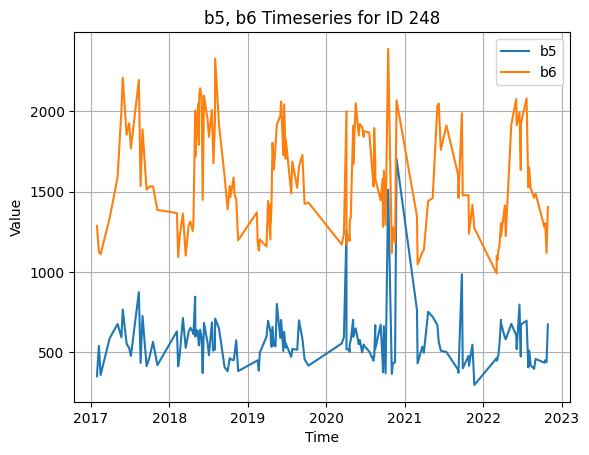

In [52]:
index1 = "b5"
index2 = "b6"
id = 248

df_sub = df[df["id"] == id]

plt.plot(df_sub["time"], df_sub[index1], label=index1)
plt.plot(df_sub["time"], df_sub[index2], label=index2)
plt.title(f"{index1}, {index2} Timeseries for ID {id}")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()